# <center>**Quejas e Informes de Estudiantes Universitarios**<center>
# <center> **Implementación de ML** <center>


## **Descripción del problema**

Clasificar manualmente informes y quejas, que abordan una amplia gama de temas, representa un desafío laborioso y propenso a errores. La carga de trabajo adicional puede afectar la eficiencia del personal y retrasar la respuesta a problemas críticos. La implementación de un sistema de clasificación automática mediante procesamiento de lenguaje natural y aprendizaje automático se presenta como una solución para agilizar el proceso, liberando tiempo y recursos, y mejorando la gestión eficiente de los informes, contribuyendo así a un entorno universitario satisfactorio.

En este trabajo de implementación, se nos asignó un conjunto de datos donde se encuentran registrados quejas e informes de los estudiantes universitarios que tratan de asuntos que van desde lo académico hasta la integridad y seguridad en el campus universitario por lo cual se clasifican según el departamento para el que sea de interés la queja o informe. Contamos con variables como la de reportes que contiene el texto que describe la queja o informe, la edad, la nacionalidad, el género, el año y el promedio académicos del estudiante que realizó el informe. También incluye la variable a predecir que clasificará el informe en un departamento.



## **Objetivos de la implementación**
Con esta implementación buscamos construir un modelo de aprendizaje automático que pueda predecir en qué departamento se debe clasificar cada queja con la ayuda de las variables predictoras las cuales contienen las características el informe. Este trabajo puede llegar a ser de gran ayuda para conocer en qué sectores o áreas del campus los estudiantes universitarios encuentran mayores afectaciones o inconformidades. Con esto se podrán tomar decisiones sobre que área o departamento debe tomar cartas en el asunto para poder satisfacer las necesidades de los universitarios.

### **Estrategias a implementar**
* **Analizar los datos:** Esto conlleva a realizar una revisión por medio de tablas y graficas que den evidencia de la estructura y las características de los datos. Esto incluye una inspección de las variables predictoras sobre si existe una correlación entre ellas.

* **Preparación de los datos:** necesitaremos hace una limpieza de los datos para disminuir el ruido y de este modo incrementar el rendimiento del modelo, vectorizar aquellas variables predictoras discretas que lo requieran y con ayuda de diferentes métodos hacer una selección de las características que tengan mayor correlación con la variable a predecir o bien tengan una variabilidad muy baja. Para esto vemos la necesidad de balancear los datos ya que la frecuencia de las categorías puede influir a que el modelo se sesgue o sea poco preciso y hacer una selección de características con el método de cuasi-contantes para que seleccione y elimine aquellas variables que su varianza sea menor al umbral que definimos, es decir, no aportan información al modelo.

* **Ajustar los parámetros del modelo**: utilizaremos funciones que automatizan las pruebas con diferentes configuraciones de parámetros y así encontrar la que ofrece combinación que ofrece el mejor rendimiento en un modelo seleccionado con el conjunto de entrenamiento.

* **Entrenar los modelos y evaluar su rendimiento**: Por ultimo, entrenamos los modelos y los evaluamos con el conjunto de prueba procedemos. Para observar los resultados utilizaremos matrices de confusión y posterior compararemos los resultados de cada modelo.

## Importando librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from imblearn.over_sampling import RandomOverSampler #Se puede escoger otro overSampling
from sklearn.model_selection import train_test_split
from imblearn.datasets import make_imbalance
from collections import Counter
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
import re
import spacy
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense


## Conexión a los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

def load_data(file_path):
  #leer el archivo
  data = pd.read_csv(file_path, encoding = 'ISO-8859-1')
  return data

#Ruta de datos en drive
file_path = "/content/drive/MyDrive/implementacionIA/Datasetprojpowerbi.csv"

reportes = load_data(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Análisis de los datos**

Comenzaremos haciendo una exploración de cómo se encuentran los datos, algunas de ellas como la exposición de las variables, el tipo de datos de estas y su distribución.

In [ ]:
reportes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Genre        1005 non-null   object 
 1   Reports      1005 non-null   object 
 2   Age          1005 non-null   int64  
 3   Gpa          1005 non-null   float64
 4   Year         1005 non-null   int64  
 5   Count        1005 non-null   int64  
 6   Gender       1005 non-null   object 
 7   Nationality  1005 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.9+ KB


### **Descripción de las variables**
**Genre**: Es una variable discreta y corresponde al departamento donde se debe clasificar cada informe, es decir que es la variable objetivo.

**Reports**: Es una variable de tipo continua y hace referencia a la denuncia o queja que hace el estudiante.

**Age:** Es una variable de tipo contínua y corresponde a la edad del estudiante.

**Gpa:** Variable de tipo continua. El GPA (Grade Point Average) es un término utilizado en el sistema educativo estadounidense para asignar un valor numérico a las calificaciones de un estudiante.

**Year:** Tipo continua. Es el año académico del estudiante.

**Count:** Es una variable de tipo continua y corresponde a cuántas quejas ha presentado el estudiante.

**Gender:** Variable de tipo discreta: Representa el género del estudiante, en este caso Hombre o mujer, el hombre se representa mediane M y mujer mediante F.

**Nationality:** Variable de tipo discreta. Corresponde a la nacionalidad del estudiante.

La siguiente tabla presenta algunos datos estadísticos sobre las variables continuas en el dataset, mostrando también la cantidad de ejemplos que es 1005 registros.

podemos ver:

- Edad (**Age**): La edad de los estudiantes varía entre 16 y 27 años, con una media de aproximadamente 21 años.
- Promedio académico (**GPA**): El GPA tiene un rango de 0.01 a 4.97, con una media de alrededor de 2.09.
- Año académico (**Year**): Los datos abarcan desde el año 1 hasta el 5

- **Count**: Esta columna muestra una falta de variabilidad, ya que todos los valores son iguales a 1. Esto indica que no proporciona información útil para el modelo y es candidata a ser eliminada durante la selección de características.

In [ ]:
print(reportes.describe())

               Age          Gpa         Year   Count
count  1005.000000  1005.000000  1005.000000  1005.0
mean     21.298507     2.088856     2.684577     1.0
std       3.338841     1.208738     1.461665     0.0
min      16.000000     0.010000     1.000000     1.0
25%      18.000000     1.080000     1.000000     1.0
50%      21.000000     2.110000     2.000000     1.0
75%      24.000000     3.090000     4.000000     1.0
max      27.000000     4.970000     5.000000     1.0


**A continuación** comprobaremos que no se encuentren valores nulos para ninguno de los ejemplos en el conjunto de datos.

In [ ]:
print(reportes.isna().sum())

Genre          0
Reports        0
Age            0
Gpa            0
Year           0
Count          0
Gender         0
Nationality    0
dtype: int64


Vemos que para ninguno de los ejemplos existen valores nulos.
Esto es una buena señal, ya que nos permite avanzar con más confianza en el proceso de preprocesamiento y modelado sin la necesidad de ocuparte de imputar o manejar valores faltantes.

Ahora mostramos cuantos tipos de categorias de reportes se encuentran.

In [ ]:
print(reportes['Genre'].unique())

['Academic Support and Resources' 'Athletics and sports'
 'Career opportunities' 'Financial Support'
 'Health and Well-being Support' 'International student experiences'
 'Online learning' 'Student Affairs' 'Housing and Transportation'
 'Activities and Travelling' 'Food and Cantines']


### **Categorías de los reportes**
Con el anterior resultado podemos apreciar que hay 11 categorías:
1. Academic Support and Resources
2. Food and Cantines
3. Financial Support
4. Online learning
5. Career opportunities
6. International student experiences
7. Athletics and sports
8. Housing and Transportation
9. Health and Well-being Support
10. Activities and Travelling
11. Student Affairs       


### **Distribución de las categorías**
El numero de veces que aparece cada categoría en la columna **Genre**.

In [ ]:
print(reportes['Genre'].value_counts())

Academic Support and Resources       236
Food and Cantines                    138
Financial Support                     91
Online learning                       90
Career opportunities                  89
International student experiences     86
Athletics and sports                  85
Housing and Transportation            64
Health and Well-being Support         53
Activities and Travelling             40
Student Affairs                       33
Name: Genre, dtype: int64


En la tabla anterior observamos que los datos están desbalanceados ya que cada categoría presenta una variación significativa con respecto a las otras en cuanto a la cantidad de ejemplos.
Para tener una más rapida comprensión de lo mencionado, se presenta una gráfica que describe la situación.

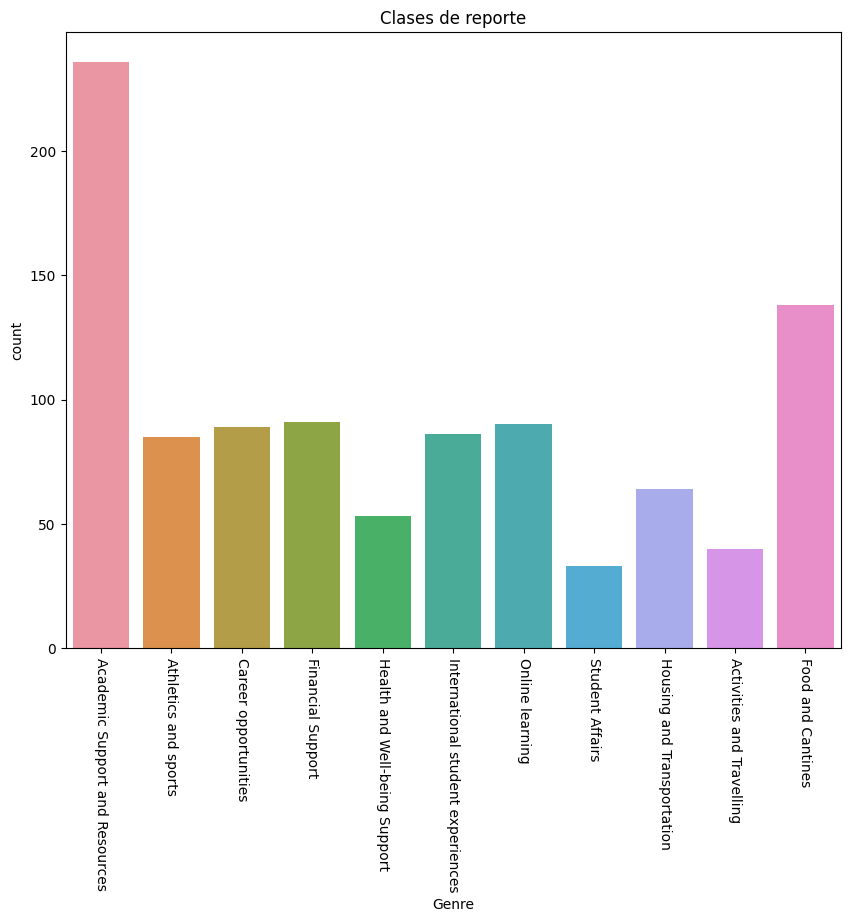

In [ ]:
#Histograma del atributo clase
ax=plt.subplots(1,1,figsize=(10,8))

sns.countplot(x="Genre",data=reportes)
plt.title("Clases de reporte")
plt.xticks(rotation=-90)
plt.show()

### Nube de palabras

En esta sección implementamos una nube de palabras donde se muestran las palabras más frecuentes de cada una de las categorias.


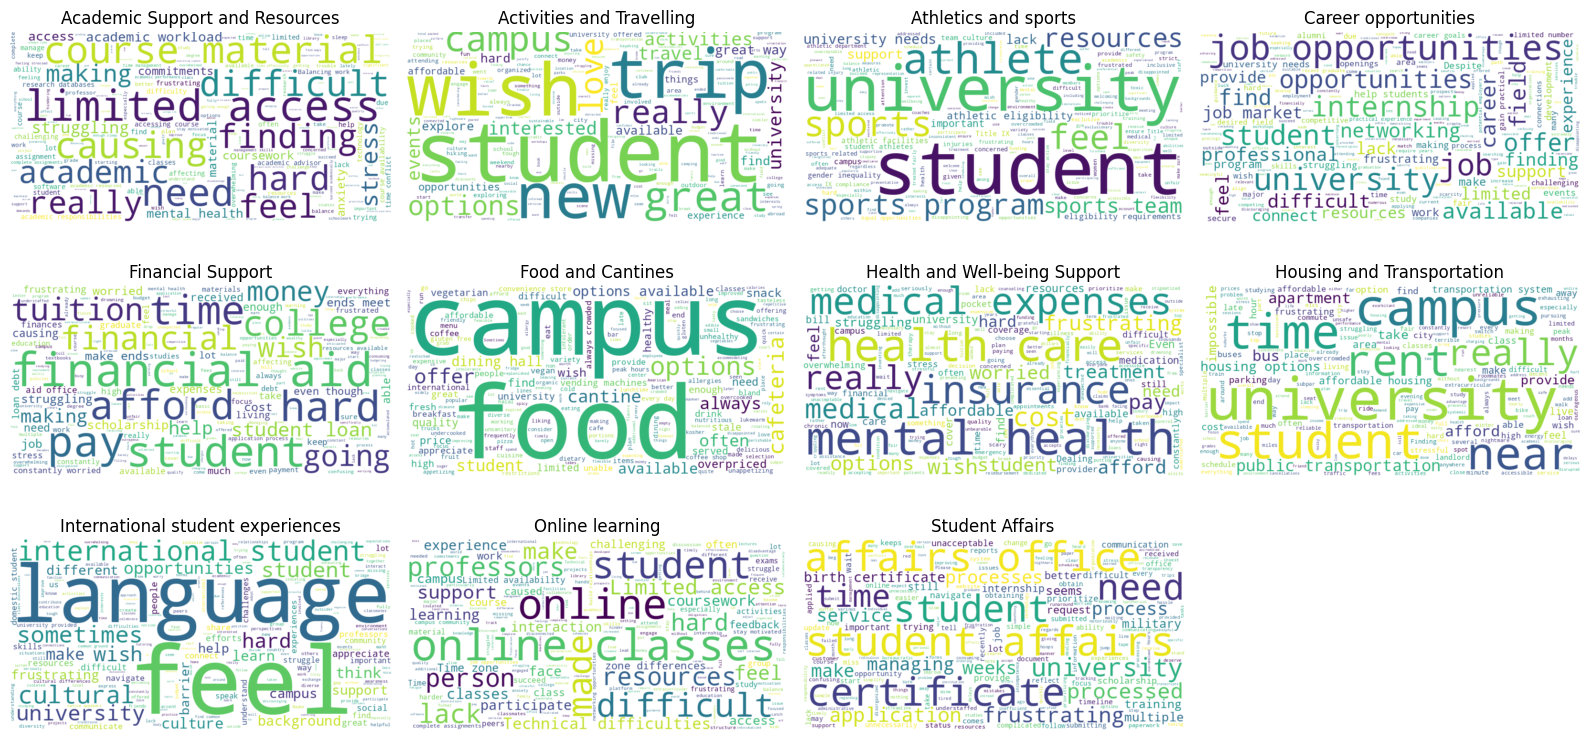

In [ ]:
palabras_por_categoria = reportes.groupby('Genre')['Reports'].apply(lambda x: [str(word) for word in x])

wordclouds = {}
for categoria, palabras in palabras_por_categoria.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(palabras))
    wordclouds[categoria] = wordcloud

# Display the word clouds for each category
plt.figure(figsize=(16, 8))
for i, (categoria, wordcloud) in enumerate(wordclouds.items()):
    plt.subplot(3, 4, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(categoria)
    plt.axis('off')
plt.tight_layout()
plt.show()

 Las gráficas anteriores serán útiles para validar los resultados del modelo.
  
- Las palabras que aparecen con mayor tamaño en la nube de palabras son las más frecuentes dentro de esa categoría. Estas palabras clave pueden representar los temas o conceptos más recurrentes relacionados con esa categoría en particular, como por ejemplo en la categoria **food and cantines** podemos ver que las palabras que mas resaltan son: **food**, **campus**.

- Si las palabras clave identificadas por el modelo coinciden con las destacadas en la nube de palabras, esto puede proporcionar confianza en la interpretación del modelo.

- Además la nube de palabras podría servir para dar priorización a qué problema tratar primero dependiendo de la cantidad de quejas que tenga ese problema por parte de los estudiantes

### Mostrando la cantidad de palabras que tiene cada categoría

In [ ]:
# Contar palabras por categoría y almacenar los resultados en un diccionario
recuento_palabras_por_categoria = {}
for categoria, palabras in palabras_por_categoria.items():
    # Unir todas las palabras de la categoría en un solo string
    todas_las_palabras = ' '.join(palabras)

    # Dividir el texto en palabras individuales
    palabras_individuales = todas_las_palabras.split()

    # Contar las palabras y guardar el recuento por categoría
    recuento_palabras = Counter(palabras_individuales)

    # Almacenar el recuento en el diccionario
    recuento_palabras_por_categoria[categoria] = {
        'Recuento_total': sum(recuento_palabras.values()),
        'Numero_palabras_unicas': len(recuento_palabras)
    }

# Mostrar el resultado final del recuento de palabras por categoría
for categoria, recuento in recuento_palabras_por_categoria.items():
    print(f"Para la categoría '{categoria}':")
    print("Total de palabras:", recuento['Recuento_total'])
    print("Número de palabras únicas:", recuento['Numero_palabras_unicas'])
    print("----------------------------")

Para la categoría 'Academic Support and Resources':
Total de palabras: 5551
Número de palabras únicas: 783
----------------------------
Para la categoría 'Activities and Travelling':
Total de palabras: 1473
Número de palabras únicas: 458
----------------------------
Para la categoría 'Athletics and sports':
Total de palabras: 1781
Número de palabras únicas: 466
----------------------------
Para la categoría 'Career opportunities':
Total de palabras: 1719
Número de palabras únicas: 404
----------------------------
Para la categoría 'Financial Support':
Total de palabras: 1638
Número de palabras únicas: 416
----------------------------
Para la categoría 'Food and Cantines':
Total de palabras: 2075
Número de palabras únicas: 476
----------------------------
Para la categoría 'Health and Well-being Support':
Total de palabras: 1052
Número de palabras únicas: 316
----------------------------
Para la categoría 'Housing and Transportation':
Total de palabras: 1626
Número de palabras únicas: 4

podemos inferir ciertas conclusiones preliminares sobre la diversidad léxica y la amplitud de vocabulario en cada tipo:

**Categorías con mayor diversidad léxica**:

'Academic Support and Resources': Con 783 palabras únicas de un total de 5551, esta categoría muestra una buena diversidad léxica en relación con la cantidad total de palabras utilizadas.
'International student experiences': Con 570 palabras únicas de 2582, esta categoría también muestra una considerable diversidad léxica en comparación con su volumen total de palabras.

**Categorías con menor diversidad léxica**:

'Student Affairs': A pesar de tener un total de 1017 palabras, solo cuenta con 349 palabras únicas, lo que sugiere una diversidad léxica más limitada en comparación con otras categorías.

**Categorías intermedias en diversidad léxica**:

Otras categorías como 'Activities and Travelling', 'Financial Support', 'Online learning', y las demas, muestran un equilibrio intermedio entre el número total de palabras y el número de palabras únicas, lo que indica una diversidad léxica moderada.

Se muestra de manera textual detallada para mayor precisión, sin embargo para una vista rápida en general podríamos apreciar la información en una gráfica

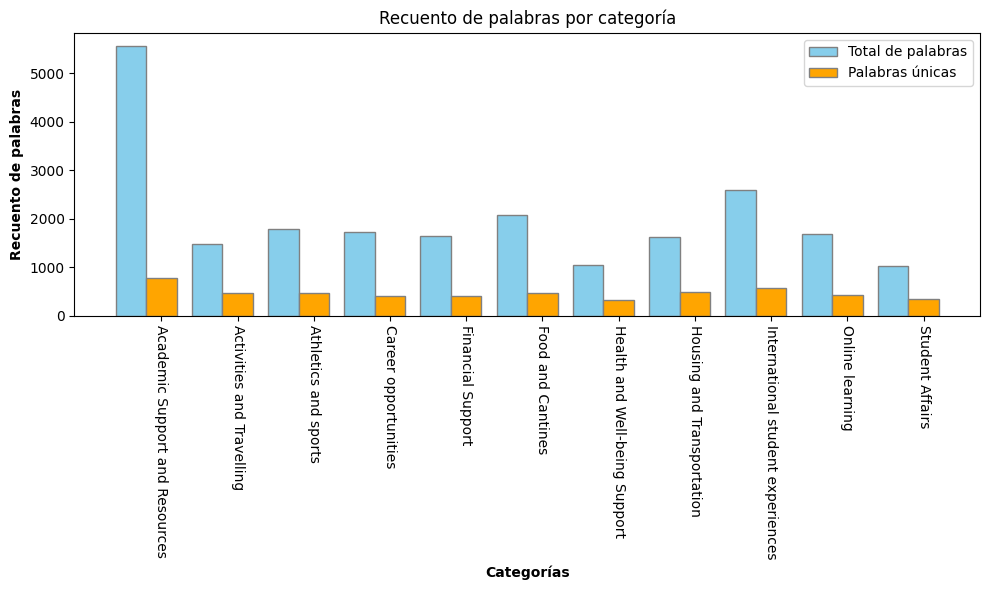

In [ ]:
categorias = list(recuento_palabras_por_categoria.keys())
recuento_total_palabras = [recuento['Recuento_total'] for recuento in recuento_palabras_por_categoria.values()]
num_palabras_unicas = [recuento['Numero_palabras_unicas'] for recuento in recuento_palabras_por_categoria.values()]

# Configurar la figura y los ejes
plt.figure(figsize=(10, 6))

# Crear barras apiladas
barWidth = 0.4
r1 = np.arange(len(categorias))
r2 = [x + barWidth for x in r1]

# Graficar el recuento total de palabras
plt.bar(r1, recuento_total_palabras, color='skyblue', width=barWidth, edgecolor='grey', label='Total de palabras')

# Graficar el número de palabras únicas
plt.bar(r2, num_palabras_unicas, color='orange', width=barWidth, edgecolor='grey', label='Palabras únicas')

# Configurar etiquetas y título
plt.xlabel('Categorías', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(categorias))],categorias, rotation = 45)
plt.ylabel('Recuento de palabras', fontweight='bold')
plt.title('Recuento de palabras por categoría')
plt.xticks(rotation=-90)
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Como podemos ver, la categoría "Academic Support and Resources" tiene muchos más datos que las demás categorías, lo que nos puede dar a entender que muchos estudiantes tienen muchas quejas en dicha categoría diciendo casi lo mismo o basándose en los mismos problemas debido a que la cantidad de palabras únicas es baja o similar a la de las demás. Por lo tanto se podría considerar hacer un balanceo de datos para mejorar el sistema

### Análisis de similitud entre palabras de categorías

Este análisis se hace con el fin de mirar palabras o temas en común entre categorías, esto con el fin de optimizar el modelo o reducir su complejidad si se llega a encontrar mucha similitud entre palabras combinando dichas categorías

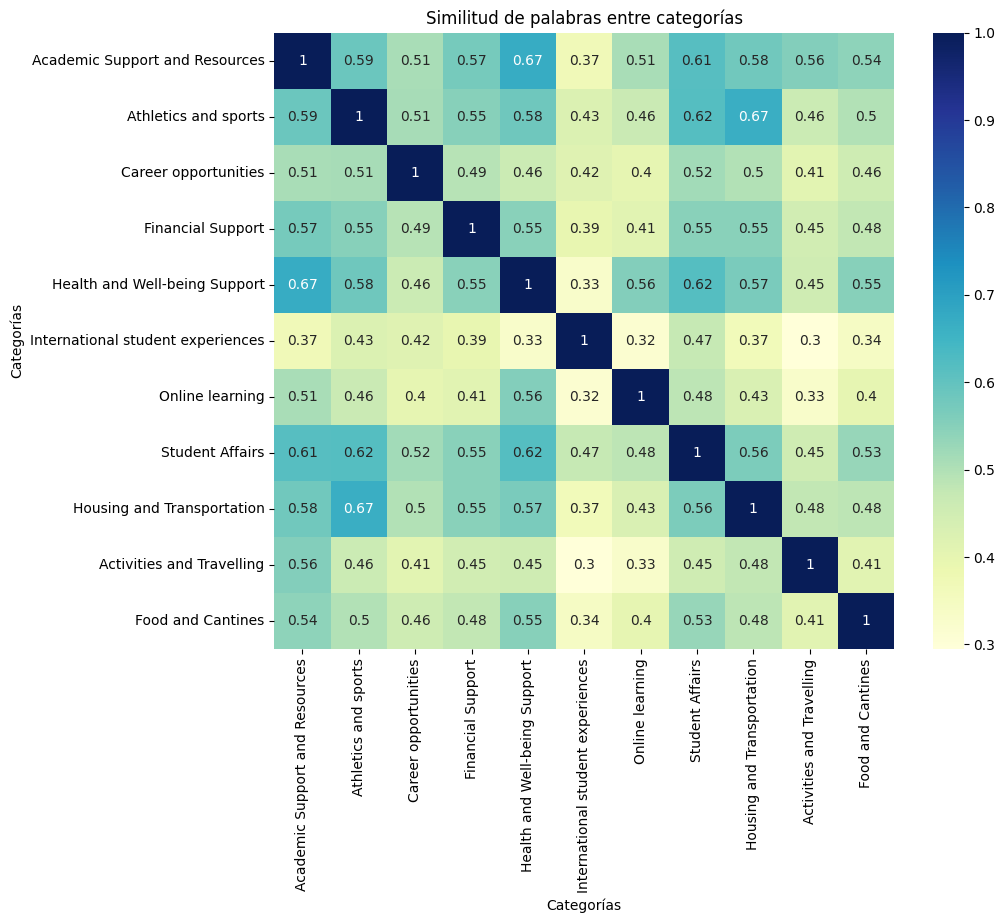

In [ ]:
# Crear un objeto TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Obtener el texto para cada categoría
textos_por_categoria = reportes.groupby('Genre')['Reports'].apply(lambda x: ' '.join(x)).tolist()

# Aplicar TF-IDF a los textos por categoría
tfidf_matrix = tfidf_vectorizer.fit_transform(textos_por_categoria)

# Calcular la similitud entre categorías basada en TF-IDF
similitud = cosine_similarity(tfidf_matrix)

# Crear el DataFrame de similitud
similitud_df = pd.DataFrame(similitud, columns=reportes['Genre'].unique(), index=reportes['Genre'].unique())

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(similitud_df, annot=True, cmap="YlGnBu")
plt.title('Similitud de palabras entre categorías')
plt.xlabel('Categorías')
plt.ylabel('Categorías')
plt.show()

Podemos ver que hay 2 pares de categoríoas el cual su resultado de similitud es del 0.67 el cual es un valor alto, sin embargo no es lo suficiente como para que tomemos la decisión de combinar dichas categorías, por lo tanto se dejaría como está normalmente.

### **Gráfico de dispersión 3D**



In [ ]:
  diagrama = px.scatter_3d(reportes, x='Age', y='Gpa',z='Year',
                color='Genre')
  diagrama.show()

####**Analisis del grafico de dispersion**

El gráfico de dispersión tridimensional proporciona una representación visual de la distribución de datos en función de tres variables: Age, GPA, Year de los estudiantes que presentaron informes en diversas categorías.

Al realizar un análisis más detallado y filtrar los datos por categoría, se observaron tendencias y patrones:

- Academic Support and Resources: Los informes en esta categoría parecen provenir mayoritariamente de estudiantes de primero y segundo año, ya que se concentran en el segmento correspondiente a estos años académicos en el gráfico de dispersión. Esto sugiere que los estudiantes de primeros años son los principales emisores de informes relacionados con apoyo académico y recursos.

- Food and Cantines: Los datos relacionados sugieren una mayor concentración de informes emitidos por estudiantes con edades comprendidas entre 18 y 23 años. En cuanto al GPA, se observa una dispersión más amplia que abarca la mayoría de los valores. Respecto al año académico, se nota una distribución equitativa de informes a lo largo de los cinco años, sin mostrar un patrón específico.

- Financial Support: Los datos relacionados no muestran un patrón discernible, ya que los informes se encuentran dispersos a lo largo de todas las variables, sin presentar agrupaciones o tendencias notables.

- Online learning: En esta categoria, se aprecia una dispersión donde los informes no revelan un patrón definido y se distribuyen ampliamente a lo largo de todas las variables sin mostrar una concentración específica.

- Career opportunities: Por el contrario de academic sopport and resources, los informes relacionados con career opportunitis están mayormente asociados con estudiantes de último y cuarto año. Es notable que la gran mayoría de informes provienen de estos niveles de estudio, con una presencia (1) de estudiantes de segundo año en esta categoría.

 En las siguientes categorias(International student experiences, Athletics and sports, Housing and Transportation, Health and Well-being, Support Activities and Travelling, Student Affairs) se observa que los datos no presentan un patron notable.




### **Distribución de las variables predictoras**

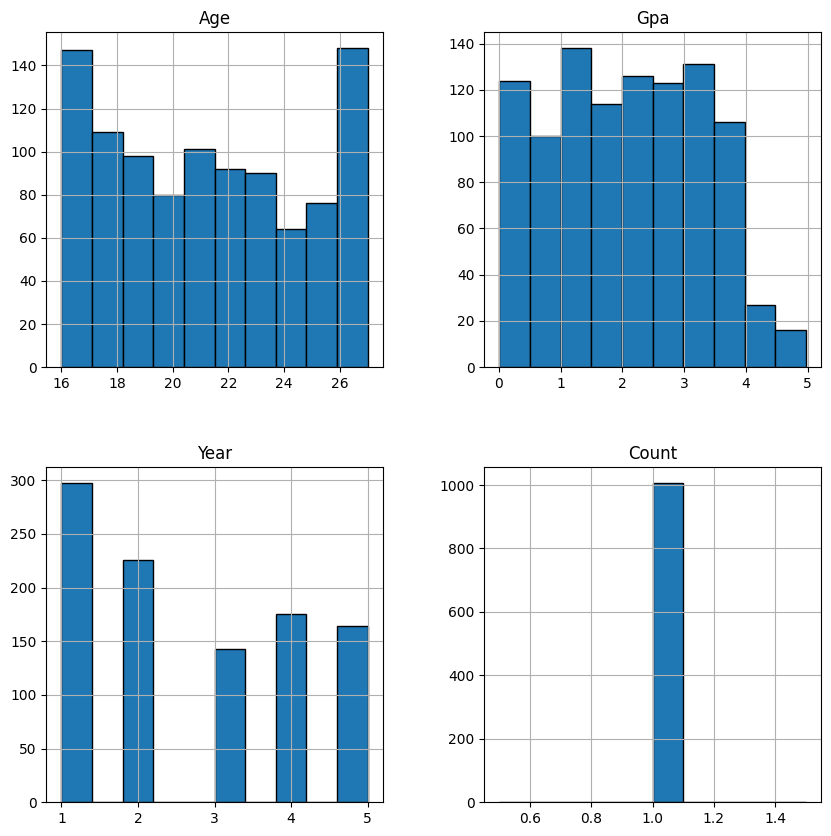

In [ ]:
reportes.hist(['Age', 'Gpa', 'Year', 'Count', ],edgecolor='black', linewidth=1.0)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Observando las variables continuas, se nota que no siguen una distribución normal y que Count efectivamente cuenta con un único valor, por lo que se procede a eliminarla.

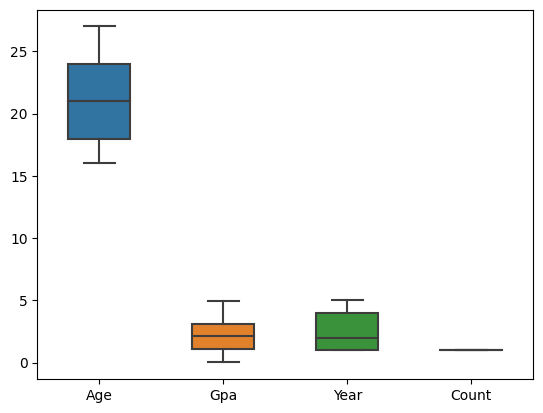

In [ ]:
reportesbox = reportes
box_data = reportes #variable representing the data array
box_target = reportes.Genre #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5)
#sns.set(rc={'figure.figsize':(2,15)})
plt.show()

Este diagrama de cajas y bigotes podemos observar: en la variable **Year** con la línea central de la caja que los datos no son simétricos y no es probable que tengan una distribución normal, estos se encuentran sesgados ya que la mediana se encuentra más cercana al percentil 25. Además, con los bigotes nos indican que podemos esperar valores máximos que superan el promedio pero que no alcanzan a ser outliers. En los gráficos de **Age** y **Gpa** aunque a simple vista parezcan que los datos son simétricos, notamos que difieren en la distancia del bigote superior e inferior siento el bigote superior más extenso esperando una varianza de los datos que apunten hacía esa dirección. Al igual que en los histogramas, la variable **Count** muestra que todos sus valores tienen un mismo valor.

In [ ]:
reportes.drop( columns=['Count'], inplace=True)



### **Separación de las variables predictoras de la  variable a predecir**



In [ ]:
#Categorias
target = reportes.Genre
reportes.drop( columns=['Genre'], inplace=True)

### **Inspeccionando la correlación de las variables predictorias continuas**

<ipython-input-105-bd7691978662>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



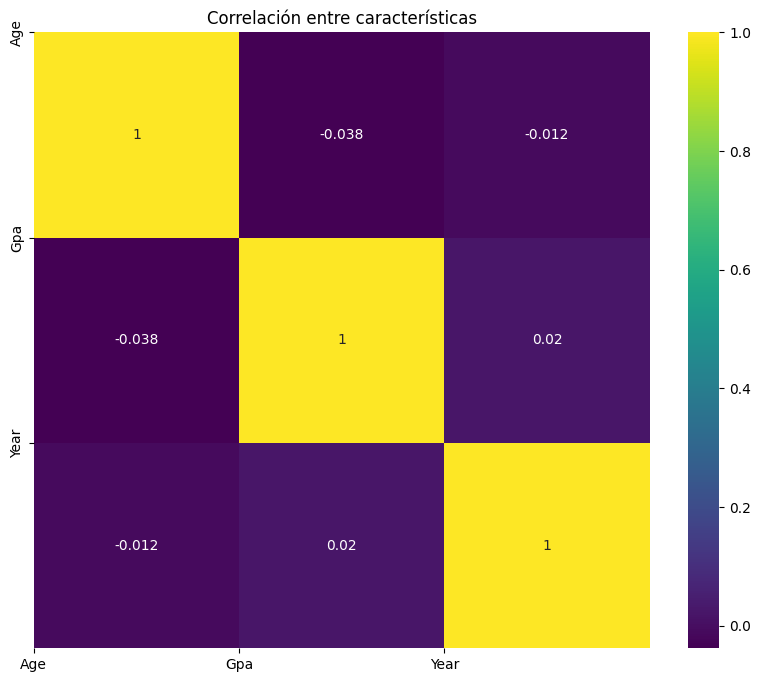

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = reportes.corr()
sns.heatmap(corr, annot=True, square=True, cmap='viridis', vmax=1)
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlación entre características")
plt.show()

Se aprecia que no hay correlación significativa entre las variables

## **Preparación de los datos**

La calidad de los datos tiene un impacto significativo en la eficacia y la precisión del modelo por lo que Encontramos importante limpiar los datos de la variable **Reports**. Se tiene en cuenta :
* Convertir el texto de los informes a minusculas
* Eliminar numeros
* Eliminar preposiciones y palabras vacías

Cargamos modelo de Spacy para procesamiento de texto en inglés

In [ ]:
nlp = spacy.load("en_core_web_sm")

Definimos una función que nos ayudará a limpiar los comentarios

In [ ]:
def limpiar_comentario(texto):
    #pasar a minusculas
    texto = texto.lower()
    # Eliminar números
    texto = re.sub(r'\d+', '', texto)
    # Tokenizar el texto usando spaCy
    tokens = nlp(texto)
    # Eliminar preposiciones y palabras vacías
    tokens_filtrados = [token.text for token in tokens if not token.is_stop and not token.is_punct]
    # Unir los tokens de nuevo en un texto limpio
    texto_limpio = ' '.join(tokens_filtrados)
    return texto_limpio

Ya con la función lista limpiamos los comentarios de la variable **Reports**.

In [ ]:
reportes['Reports'] = reportes['Reports'].apply(limpiar_comentario)

### **Vectorización**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def tfidf_vectorization(texts, prefix =''):

    tfidf_vectorizer = TfidfVectorizer( stop_words='english' )
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    if prefix:
       feature_names = [f"{prefix}_{feature}" for feature in feature_names]
    return pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names,)


##VECTORIZACIÓN##
vectorizador = CountVectorizer()
# Aplicar el vectorizador a los datos
vectorized = vectorizador.fit_transform(reportes['Reports'])
# Obtener las características (palabras) vectorizadas
caracteristicas = vectorizador.get_feature_names_out()
print(caracteristicas)
print(vectorized.toarray())


vectorized_comments = pd.DataFrame(vectorized.toarray(), columns=caracteristicas)
vectorized_nationality = pd.get_dummies( reportes[ 'Nationality' ], prefix='Nacionality' )
vectorized_gender =  pd.get_dummies(reportes['Gender'], prefix='Gender')

vectorized_nationality= vectorized_nationality.astype(int)
vectorized_gender= vectorized_gender.astype(int)

reportes = pd.concat([reportes,vectorized_comments, vectorized_gender, vectorized_nationality], axis=1)
#Eliminando las columnas que se convirtieron a numericas
reportes.drop( columns=[ 'Gender', 'Nationality', 'Reports'], inplace=True)

['abilities' 'ability' 'able' ... 'year' 'years' 'zone']
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


A continuación, vemos el resultado de la vectorización, hemos pasado a tener 1644 variables predictoras, dicho número es bastante amplio, por lo que podría acarrear problemas de costo computacional e incluso en la precisión del modelo. Por lo que se procederá a usar distintos métodos para seleccionar las características más relevantes

In [ ]:
print(reportes)

      Age   Gpa  Year  abilities  ability  able  abroad  academic  \
0      27  2.18     2          0        0     1       0         0   
1      23  3.11     2          0        0     0       0         0   
2      20  3.68     2          0        0     0       0         0   
3      20  1.30     2          0        0     0       0         1   
4      26  2.50     2          0        0     0       0         0   
...   ...   ...   ...        ...      ...   ...     ...       ...   
1000   18  1.16     4          0        0     0       0         0   
1001   20  4.05     2          0        0     0       0         0   
1002   22  1.86     3          0        0     0       0         0   
1003   20  2.06     2          0        0     0       0         0   
1004   21  2.58     1          0        0     0       0         0   

      academically  academics  ...  zone  Gender_F  Gender_M  \
0                1          0  ...     0         0         1   
1                0          0  ...     0   

### **Balanceo de datos**

 Los modelos de machine learning pueden sesgarse hacia las clases dominantes en conjuntos de datos desbalanceados. Esto significa que el modelo podría volverse demasiado bueno para predecir la clase mayoritaria, pero no tan efectivo para las clases minoritarias. Al equilibrar el conjunto de datos, se ayuda al modelo a aprender patrones de manera más justa para todas las clases, mejorando así su rendimiento general.
 Los datos balanceados se guardarán en variables distintas a donde se encuentran los originales de modo que podamos realizar comparaciones sobre cómo se comportan los modelos con ambos conjuntos.

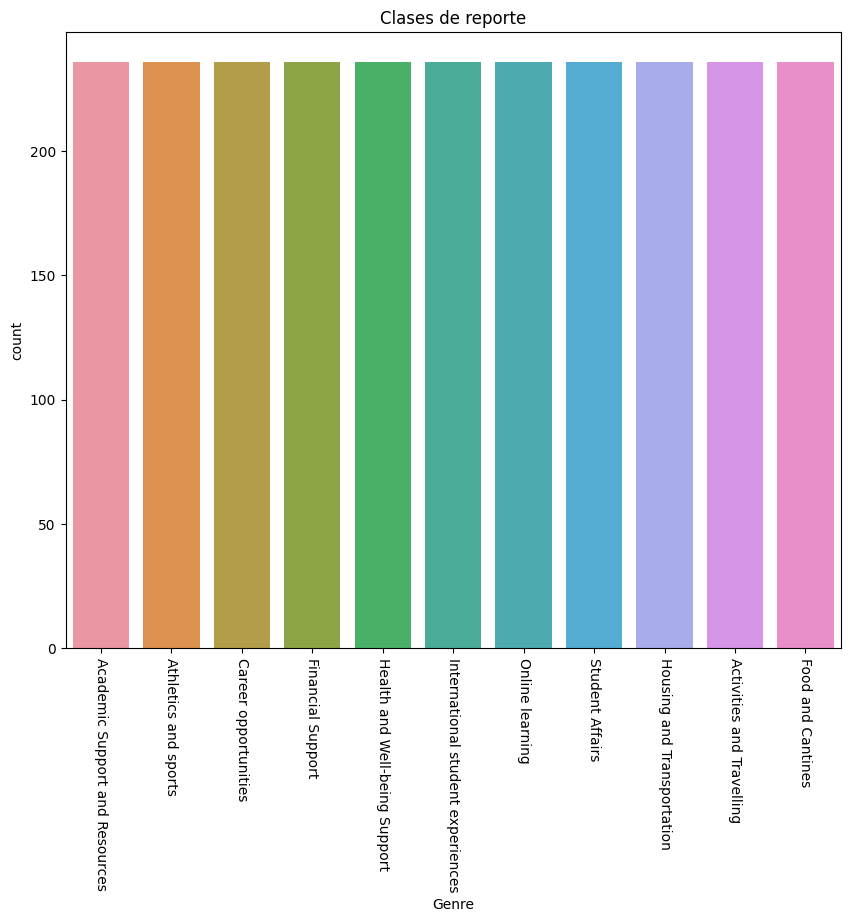

In [ ]:

#BALANCEO DE LOS DATOS OVER SAMPLING
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(reportes, target)

#Histograma del atributo clase
bx=plt.subplots(1,1,figsize=(10,8))

sns.countplot(x=y_resampled, data=y_resampled)
plt.title("Clases de reporte")
plt.xticks(rotation=-90)
plt.show()


In [ ]:
print( f"Al balancear los datos el número de ejemplos asciende a {X_resampled.shape[0]}" )

Al balancear los datos el número de ejemplos asciende a 2596


### **Fraccionar los datos entre entramiento y prueba**


Se utilizó la función train_test_split de la librería ya importada de sklearn.model_selection para esta tarea.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled)

X_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(
    reportes, target)




In [ ]:
print("----------------------------------------------------------------------------------")
print("Balanceados")
print( f"El número de datos seleccionado para entramiento fue de {X_train.shape[0]}" )
print( f"El número de datos seleccionado para prueba fue de {X_test.shape[0]}" )
print("----------------------------------------------------------------------------------")
print("Desbalanceados")
print( f"El número de datos seleccionado para entramiento fue de {X_train_unbalanced.shape[0]}" )
print( f"El número de datos seleccionado para prueba fue de {X_test_unbalanced.shape[0]}" )

----------------------------------------------------------------------------------
Balanceados
El número de datos seleccionado para entramiento fue de 1947
El número de datos seleccionado para prueba fue de 649
----------------------------------------------------------------------------------
Desbalanceados
El número de datos seleccionado para entramiento fue de 753
El número de datos seleccionado para prueba fue de 252


### **Selección de caracteristicas**

Para seleccionar las caracteristicas que tengan una mayor influencia con la variable a predecir, sin que afecte significativamente la varianza con respecto a los datos originales , usaremos el método de cuasi-constantes, el cual es un proceso en el que identificas y eliminas características que tienen una variabilidad muy baja, es decir, aquellas que tienen casi el mismo valor en todos los ejemplos del conjunto de datos. Estas características pueden no aportar mucha información al modelo y pueden afectar negativamente su rendimiento.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
def cuasi_constantes( x_train, x_test, threshold = 0.01) :
  variance_selector = VarianceThreshold(threshold= threshold)
  xtrain = variance_selector.fit_transform(x_train)
  selected_feature_indices = x_train.columns[variance_selector.get_support(indices=True)].tolist()
  xtest = variance_selector.transform(x_test)
  print("Variables seleccionadas")
  print(selected_feature_indices)

  return xtrain, xtest, selected_feature_indices

In [ ]:

xtrain, xtest, selected_feature_indices = cuasi_constantes(X_train, X_test)
xtrain_unbalanced, xtest_unbalanced, selected_feature_indices_unbalanced = cuasi_constantes(X_train_unbalanced, X_test_unbalanced)
print(f"Nueva dimensión datos balanceados: {xtrain.shape}")
print(f"Nueva dimensión datos desbalanceados {xtrain_unbalanced.shape}")

Variables seleccionadas
['Age', 'Gpa', 'Year', 'ability', 'able', 'academic', 'access', 'accessible', 'activities', 'affairs', 'affecting', 'afford', 'affordable', 'aid', 'anxiety', 'apartment', 'application', 'appreciate', 'area', 'assignments', 'athletes', 'athletic', 'attending', 'availability', 'available', 'away', 'backgrounds', 'balance', 'barrier', 'better', 'bike', 'birth', 'book', 'bus', 'cafeteria', 'campus', 'cantine', 'care', 'career', 'causing', 'certain', 'certificate', 'certificates', 'challenging', 'city', 'class', 'classes', 'college', 'commitments', 'communication', 'community', 'complete', 'concerned', 'conflicts', 'confusing', 'connect', 'constantly', 'cost', 'course', 'courses', 'coursework', 'cover', 'create', 'cultural', 'culture', 'databases', 'debt', 'differences', 'different', 'difficult', 'difficulties', 'dining', 'diversity', 'domestic', 'easier', 'education', 'efforts', 'eligibility', 'emergency', 'ends', 'engage', 'enjoy', 'environment', 'especially', 'eve

## **Modelos**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

Definimos una función para ayudarnos a gráficar una matriz de confusión

In [ ]:
def plt_conf_matrix(matrix):
  labels = np.unique(y_train)
  df_cm = pd.DataFrame(matrix , index=labels, columns=labels)
  plt.figure(figsize=(8, 6))
  sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
  plt.title("Matriz de Confusión")
  plt.xlabel("Etiqueta Predicha")
  plt.ylabel("Etiqueta Verdadera")
  plt.show()

### **Arboles de decisión**

Creamos una instancia del modelo

In [ ]:
dt_classifier = DecisionTreeClassifier()

Se define una matriz que contiene las diversas opciones de parámetros aceptadas por el modelo. Posteriormente, esta matriz se utiliza en funciones diseñadas para automatizar la selección de parámetros que proporcionen un rendimiento óptimo.

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
                   'splitter' : ['best', 'random'],
                   'max_depth': [ None ],
                   'min_samples_split': [ 2,3,5,10,15],
                   'min_samples_leaf': [1,2,3,4,5],
}

#### **Con los datos desbalanceados**

A continuación usamos GridSearchCv para  evaluar el rendimiento del modelo con diferentes conjuntos de entrenamiento y prueba con un enfoque de validación cruzada. Esto ayuda a obtener estimaciones más robustas del rendimiento del modelo, ya que evita depender en gran medida de una única división de los datos.

##### **Usando GridSearchCV**

In [ ]:
dt_Grid = GridSearchCV(estimator = dt_classifier, param_grid= param_grid, cv=2, verbose=2, n_jobs=4, scoring='accuracy')
dt_Grid.fit(X_train_unbalanced, y_train_unbalanced)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 5, 10, 15],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

La siguiente combinación de parámetros fue la que mejor resultados obtuvo.

In [ ]:
dt_Grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'random'}

Se entrena el modelo y se evalua con los datos de entrenamiento y con los de prueba, para verificar un posbile sobreajuste.

In [ ]:
y_train_unbalanced_pred = dt_Grid.predict(X_train_unbalanced)
train_accuracy = accuracy_score(y_train_unbalanced, y_train_unbalanced_pred) * 100

y_unbalanced_pred = dt_Grid.predict(X_test_unbalanced)
test_accuracy = accuracy_score(y_test_unbalanced, y_unbalanced_pred) * 100

print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))


Precisión del entrenamiento: 98.805%
Precisión de prueba: 91.667%


Observamos un alto índice de precisión. No se evidencia un sobreajuste, ya que el resultado para los datos de prueba es muy cercano a los de entrenamiento. La siguiente matriz de confusión muestra de una mejor forma el comportamiento del modelo.

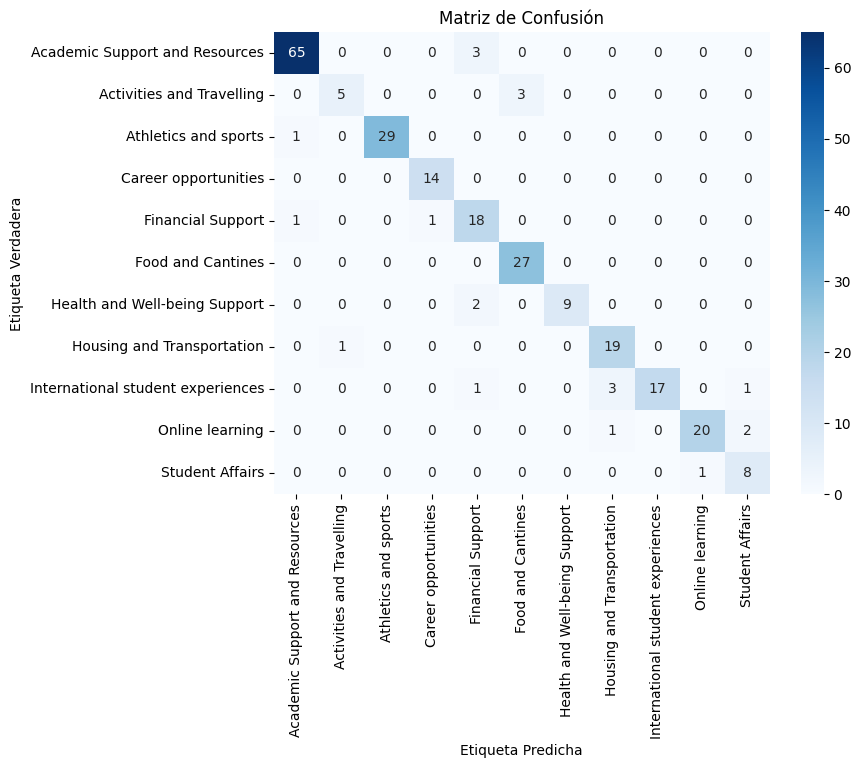

In [ ]:
conf_matrix = confusion_matrix(y_test_unbalanced, y_unbalanced_pred)
plt_conf_matrix( conf_matrix )

Al analizar los resultados, se observa que la categoría que mostró el mejor rendimiento fue 'Academic support and resources', siendo también la que cuenta con mayor cantidad de ejemplos en el conjunto de datos. En contraste, 'Activities and traveling', que tiene significativamente menos ejemplos, no presenta un escenario deseable. Por ende, se buscará mejorar esta situación mediante el balanceo de datos.


##### **Usando RandomizedSearchCV**

In [ ]:
random_search_u = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_grid , n_iter=50, cv=3, scoring='accuracy', random_state=42)

In [ ]:
# Ajustar el modelo a los datos de entrenamiento
random_search_u.fit(xtrain_unbalanced, y_train_unbalanced)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search_u.best_params_)

# Mostrar la mejor puntuación obtenida en la validación cruzada
print("Mejor puntuación en validación cruzada:", "{:.3f}%".format(random_search_u.best_score_ * 100))

best_model_u = random_search_u.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros en los datos de entrenamiento
y_predict_train_unbalanced_random_search = best_model_u.predict(xtrain_unbalanced)
accuracy_unbalanced = accuracy_score(y_train_unbalanced, y_predict_train_unbalanced_random_search)
print("Precisión de entrenamiento:", "{:.3f}%".format(accuracy_unbalanced * 100))

# Evaluar el modelo con los mejores hiperparámetros en los datos de prueba
y_predict_unbalanced_random_search = best_model_u.predict(xtest_unbalanced)
accuracy_unbalanced = accuracy_score(y_test_unbalanced, y_predict_unbalanced_random_search)
print("Precisión de prueba:", "{:.3f}%".format(accuracy_unbalanced * 100))

Mejores hiperparámetros: {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
Mejor puntuación en validación cruzada: 91.501%
Precisión de entrenamiento: 98.805%
Precisión de prueba: 90.873%


Con esta nueva combinación de parametros donde al aumentar 'min_samples_split' y 'min_samples_leaf' vemos una reducción en la precisión al momento de evaluar el modelo con los datos de prueba pero no es mayor a una unidad en ninguno de los casos. En general seguimos viendo un buen resultado en el modelo.

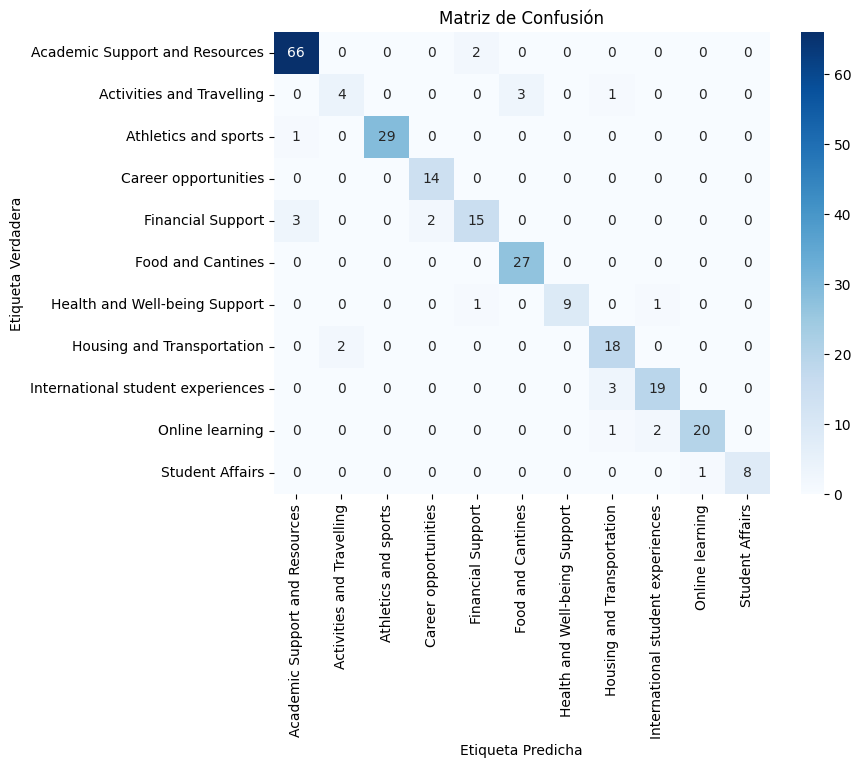

In [ ]:
plt_conf_matrix( confusion_matrix(y_test_unbalanced, y_predict_unbalanced_random_search) )

Sigue presentándose resultados similares con estos nuevos parámetros. Podemos concluir que al entrenar el modelo con el conjunto de los datos de entrenamiento desbalanceados influye que, al momento de evaluar el modelo con el conjunto de prueba, aquellas clases que contienen un numero de registros mayor podrá ser predicho en mayor medida correctamente que aquellas categorías que cuentan con un numero de registro pequeño.

#### **Con los datos balanceados**

##### **Usando GridSearchCV**

In [ ]:
dt_Grid = GridSearchCV(estimator = dt_classifier, param_grid= param_grid, cv=2, verbose=2, n_jobs=4, scoring='accuracy')
dt_Grid.fit(xtrain, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 5, 10, 15],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [ ]:
dt_Grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [ ]:
y_train_pred = dt_Grid.predict(xtrain)
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

y_pred = dt_Grid.predict(xtest)
test_accuracy = accuracy_score(y_test, y_pred) * 100

print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))




Precisión del entrenamiento: 100.000%
Precisión de prueba: 99.384%


Se observa una mejora importante en la precisión del modelo al evaluarlo con los datos balanceados, además no se evidencia un sobreajuste ya que notamos que la diferencia entre la precisión del modelo con los datos de entrenamiento y prueba no muestra una diferencia significativa. A continuación, se presentan los resultados de forma gráfica con una matriz de confusión.

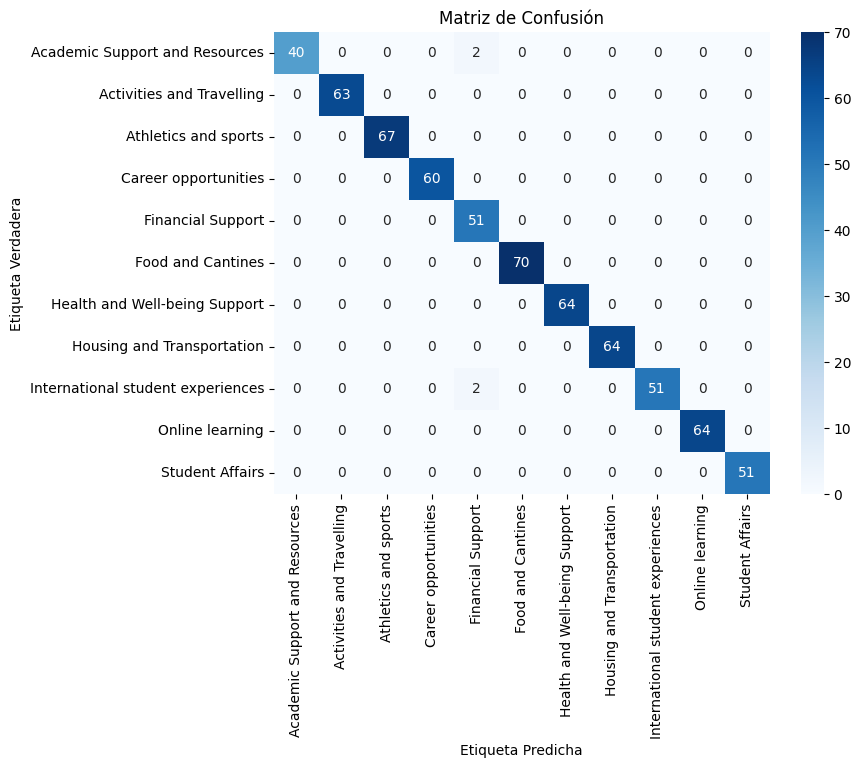

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt_conf_matrix( conf_matrix )

Esta matriz con ayuda de los parámetros dados por la función GridSearchCV nos da la razón al decir que al balancear los datos obtendríamos un mejor resultado, el resultado fue casi perfecto. De los pocos en los que falla al predecir se trata de unas categorías relacionadas como lo son 'Academic Support and Resources', 'Financial Support' e 'International student experiences', que por sus nombres pueden ir encaminados hacia los recursos economícos.

##### **Usando RandomizedSearchCV**

In [ ]:
random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_grid, n_iter=50, cv=3, scoring='accuracy', random_state=42)

In [ ]:
# Ajustar el modelo a los datos de entrenamiento
random_search.fit(xtrain, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Mostrar la mejor puntuación obtenida en la validación cruzada
print("Mejor puntuación en validación cruzada:", "{:.3f}%".format(random_search.best_score_ * 100))

best_model = random_search.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros en los datos de entrenamiento
y_predict_train_random_search = best_model.predict(xtrain)
accuracy = accuracy_score(y_train, y_predict_train_random_search)
print("Precisión de entrenamiento:", "{:.3f}%".format(accuracy * 100))

# Evaluar el modelo con los mejores hiperparámetros en los datos de prueba
y_predict_random_search = best_model.predict(xtest)
accuracy = accuracy_score(y_test, y_predict_random_search)
print("Precisión de prueba:", "{:.3f}%".format(accuracy * 100))

Mejores hiperparámetros: {'splitter': 'random', 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
Mejor puntuación en validación cruzada: 98.100%
Precisión de entrenamiento: 100.000%
Precisión de prueba: 99.230%


La precisión en los casos de entrenamiento y prueba se aproxima a lo que se desea aunque con esta combinación de parametros arrojada por RandomizedSearchCV sea un poco menor en comparación a la de GridSearchCV, donde mantenían 'min_samples_split' igual a 2.

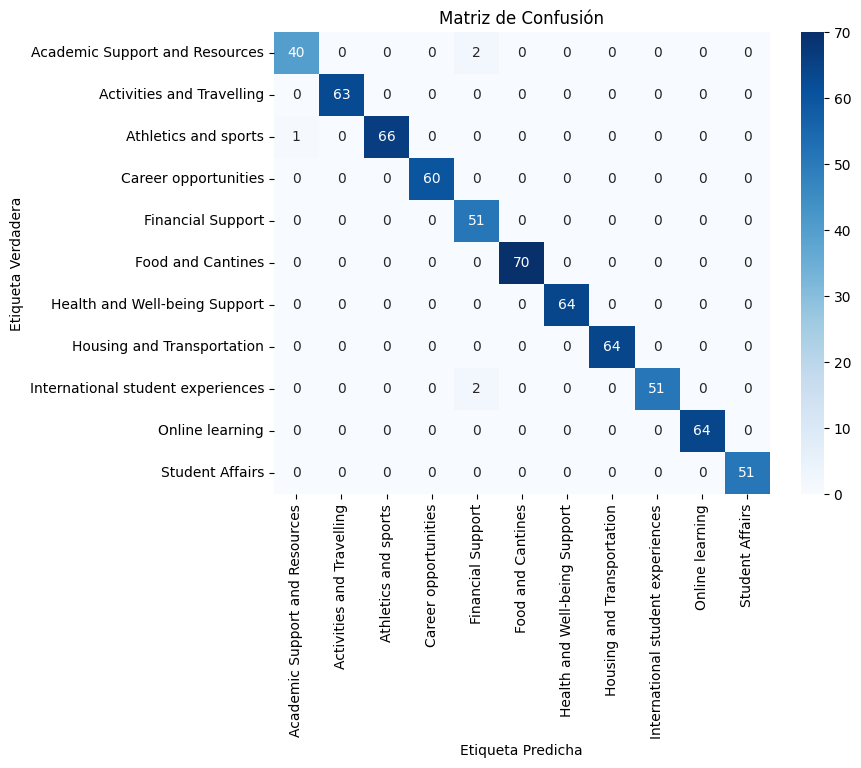

In [ ]:
plt_conf_matrix( confusion_matrix(y_test, y_predict_random_search) )

En comparación con la matriz de confusión con los parámetros de GridSearchCV, la actual muestra que el modelo solo llega a errar al clasificar un reporte más.

### **Random forest**

In [ ]:
rf_classifier = RandomForestClassifier()

Proponemos distintos valores para cada uno de los parametros, que serán utilizados por la función GridSearchCV para escoger aquellos que den un mejor resultado.

In [ ]:
param_grid = {'n_estimators': [50,100,150,200],
               'max_features': [ 'sqrt', 'log2' ],
               'max_depth': [ None ],
               'min_samples_split': [ 2, 5, 10],
               'min_samples_leaf': [1,2,3,4,5],
                }

#### **Con los datos desbalanceados**



##### **Usando GridSearchCv**

In [ ]:
rf_Grid_unbalanced = GridSearchCV(estimator = rf_classifier, param_grid = param_grid, cv = 2, verbose=2, n_jobs = 4, scoring='accuracy')
rf_Grid_unbalanced.fit(xtrain_unbalanced, y_train_unbalanced )

Fitting 2 folds for each of 120 candidates, totalling 240 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [None], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=2)

El valor valor de los parametros que darán un mejor desempeño son los siguientes:

In [ ]:
rf_Grid_unbalanced.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [ ]:
y_pred_unbalanced = rf_Grid_unbalanced.predict(xtest_unbalanced)
test_unbalanced_accuracy = accuracy_score(y_test_unbalanced, y_pred_unbalanced) * 100

y_train_unbalanced_pred = rf_Grid_unbalanced.predict(xtrain_unbalanced)
train_unbalanced_accuracy = accuracy_score(y_train_unbalanced, y_train_unbalanced_pred) * 100

print("Precisión del entrenamiento:", "{:.3f}%".format(train_unbalanced_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_unbalanced_accuracy))

Precisión del entrenamiento: 100.000%
Precisión de prueba: 96.429%


En terminos de precisión tiene mejores resultados que  arboles de decisión. De igual forma no se evidencia un sobreajuste

Comportamiento con los datos de prueba

In [ ]:
conf_matrix_unbalanced = confusion_matrix(y_test_unbalanced, y_pred_unbalanced)

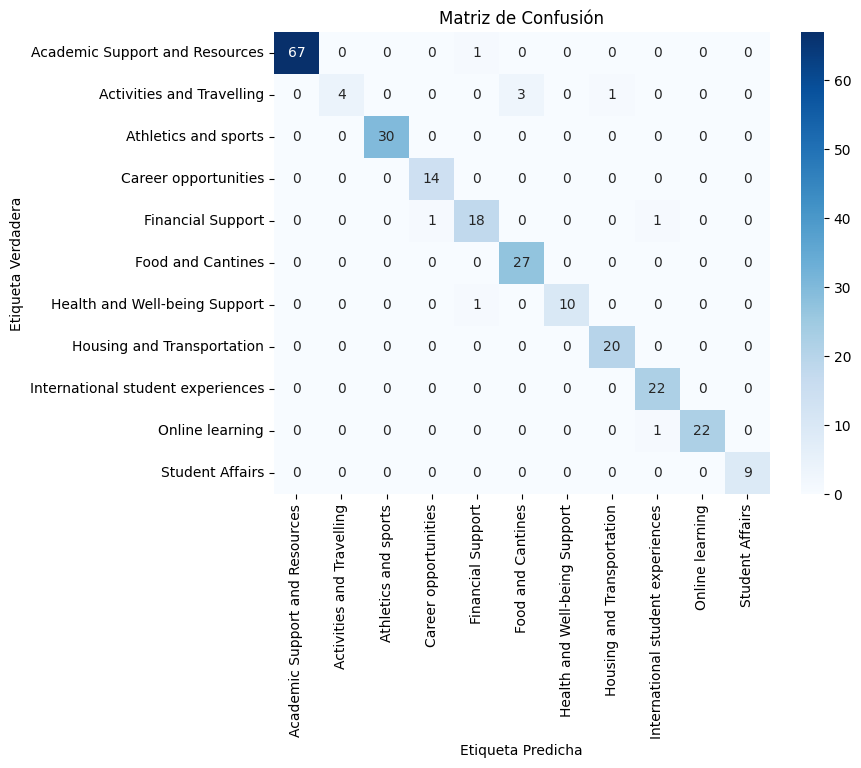

In [ ]:
plt_conf_matrix( conf_matrix_unbalanced )

La anterior gráfica presenta que el modelo es capaz de predecir correctamente los reportes que pertenecen a la categoria **Academic Support and Resources** siendo esta la categoria que mas ejemplos tiene. Y contrastando la categoria que peor predice es aquella que cuenta con menos ejemplos, es decir, la categoría **Activities and Traveling**. Por lo que balanceando los datos es posible que el modelo mejore.

##### **Usando RandomizedSearchCV**

In [ ]:

random_search_u = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=50, cv=3, scoring='accuracy', random_state=42)

In [ ]:
# Ajustar el modelo a los datos de entrenamiento
random_search_u.fit(xtrain_unbalanced, y_train_unbalanced)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search_u.best_params_)

# Mostrar la mejor puntuación obtenida en la validación cruzada
print("Mejor puntuación en validación cruzada:", "{:.3f}%".format(random_search_u.best_score_ * 100))

best_model_u = random_search_u.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros en los datos de entrenamiento
y_predict_train_unbalanced_random_search = best_model_u.predict(xtrain_unbalanced)
accuracy_unbalanced = accuracy_score(y_train_unbalanced, y_predict_train_unbalanced_random_search)
print("Precisión de entrenamiento:", "{:.3f}%".format(accuracy_unbalanced * 100))

# Evaluar el modelo con los mejores hiperparámetros en los datos de prueba
y_predict_unbalanced_random_search = best_model_u.predict(xtest_unbalanced)
accuracy_unbalanced = accuracy_score(y_test_unbalanced, y_predict_unbalanced_random_search)
print("Precisión de prueba:", "{:.3f}%".format(accuracy_unbalanced * 100))

Mejores hiperparámetros: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Mejor puntuación en validación cruzada: 94.688%
Precisión de entrenamiento: 100.000%
Precisión de prueba: 94.444%


Al usar RandomizedSearchCV se llega a la misma configuración de parámetros por lo que se asume como una de las mejores combinaciones para este caso. Se obtienen resultados muy cercanos por lo que la variabilidad en los resultados es buena.

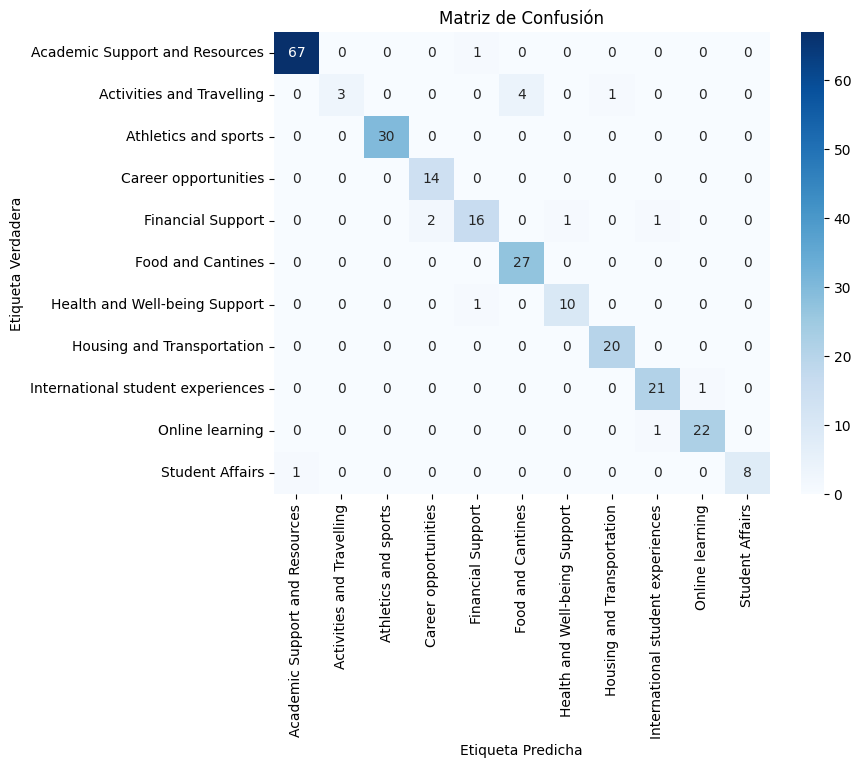

In [ ]:
plt_conf_matrix( confusion_matrix(y_test_unbalanced, y_predict_unbalanced_random_search) )

Se sigue observando una tendencia de la categoría "Activities and Traveling" como la que peores resultados obtiene.

#### **Con los datos balanceados**

A continuación se procede con el ajuste de parámetros en el modelo, buscando la mejora de este último

##### **Usando GridSearchCv**

In [ ]:
rf_Grid = GridSearchCV(estimator = rf_classifier, param_grid = param_grid, cv = 2, verbose=2, n_jobs = 4, scoring='accuracy')
rf_Grid.fit(xtrain, y_train)

Fitting 2 folds for each of 120 candidates, totalling 240 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [None], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=2)

La mejor combinación de parámetros es la siguiente

In [ ]:
rf_Grid.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
y_pred = rf_Grid.predict(xtest)
test_accuracy = accuracy_score(y_test, y_pred) * 100

y_train_pred = rf_Grid.predict(xtrain)
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))

Precisión del entrenamiento: 100.000%
Precisión de prueba: 100.000%


Al balancear los datos la precisión ha alcanzado el 100%, mostrando la relevancia de la cantidad de ejemplos para las categorías. Esto se presenta de manera más clara con la siguiente matriz de confusión.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

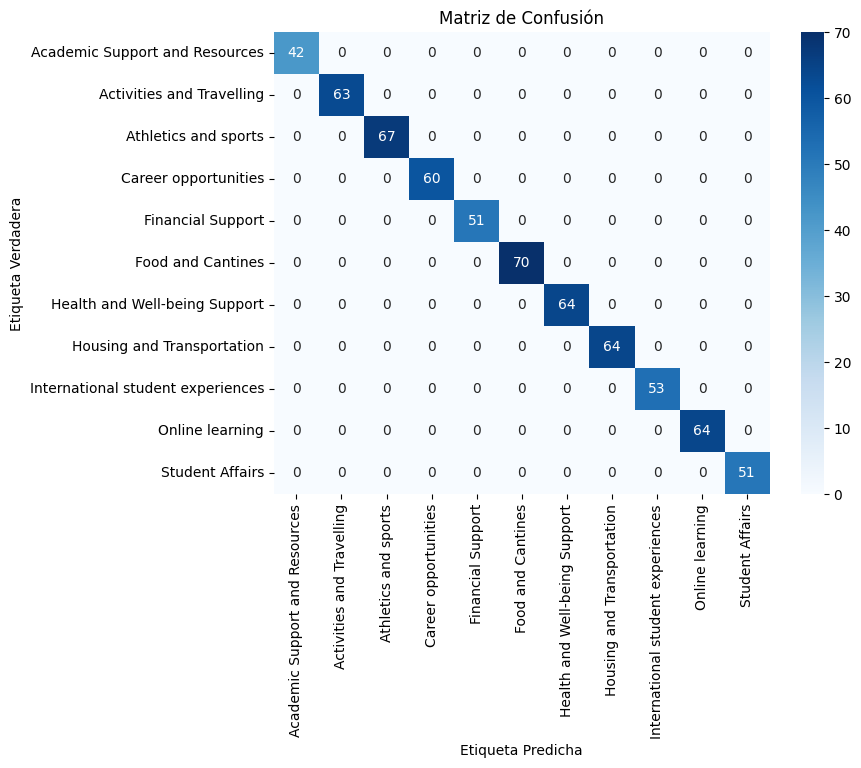

In [ ]:
plt_conf_matrix( conf_matrix)

##### **Usando RandomizedSearchCV**

In [ ]:
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=50, cv=3, scoring='accuracy', random_state=42)

In [ ]:
# Ajustar el modelo a los datos de entrenamiento
random_search.fit(xtrain, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Mostrar la mejor puntuación obtenida en la validación cruzada
print("Mejor puntuación en validación cruzada:", "{:.3f}%".format(random_search.best_score_ * 100))

best_model = random_search.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros en los datos de entrenamiento
y_predict_train_random_search = best_model.predict(xtrain)
accuracy = accuracy_score(y_train, y_predict_train_random_search)
print("Precisión de entrenamiento:", "{:.3f}%".format(accuracy * 100))

# Evaluar el modelo con los mejores hiperparámetros en los datos de prueba
y_predict_random_search = best_model.predict(xtest)
accuracy = accuracy_score(y_test, y_predict_random_search)
print("Precisión de prueba:", "{:.3f}%".format(accuracy * 100))


Mejores hiperparámetros: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Mejor puntuación en validación cruzada: 99.178%
Precisión de entrenamiento: 100.000%
Precisión de prueba: 99.692%


En la selección de parámetros el único valor distinto fue "min_samples_split", sin embargo la precisión aunque no alcanza la perfección se acerca bastante.

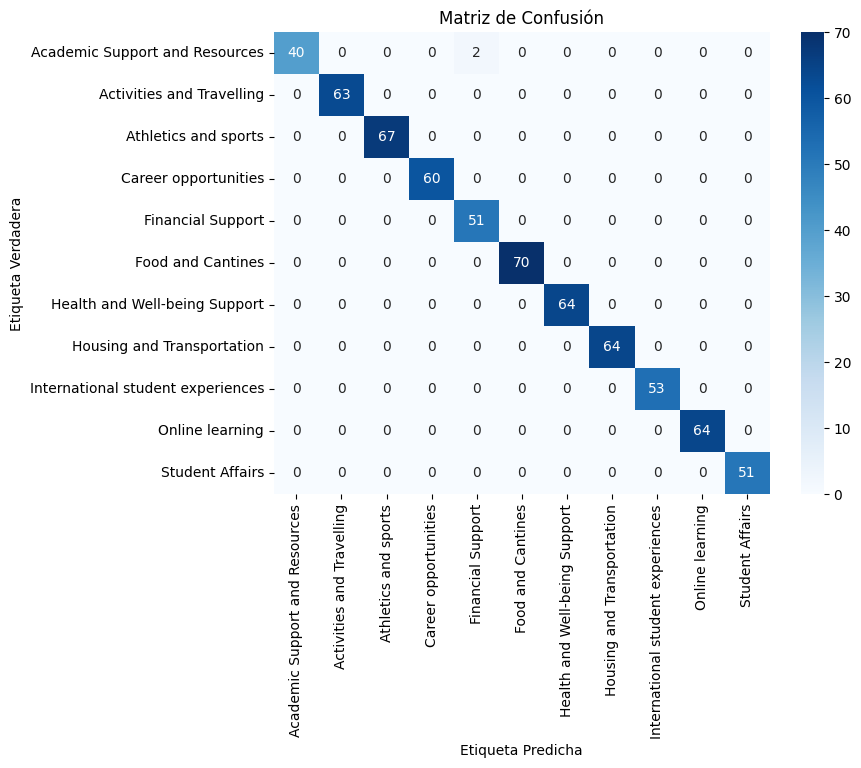

In [ ]:
plt_conf_matrix( confusion_matrix(y_test, y_predict_random_search) )

### **Redes neuronales**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import time
from sklearn import metrics

#### **Con los datos desbalanceados**

Primero escalamos los datos antes del entrenamiento para mejorar la estabilidad, la velocidad de convergencia y la capacidad del modelo para generalizar correctamente a partir de los datos de entrada.

In [ ]:
# Escalado de datos
scaler = StandardScaler(with_mean=False)
xtrains = scaler.fit_transform(xtrain_unbalanced)
xtests = scaler.transform(xtest_unbalanced)

Primero, creamos el modelo de redes neuronales llamado MLP, luego ajustamos algunos parámetros del modelo, como el tamaño de las capas ocultas, la regularización y el número máximo de iteraciones y pasamos a entrenar el modelo. Después hacemos una evaluación para saber que tan bien quedó entrenado el modelo

In [ ]:
# Definir y entrenar el clasificador MLP
model = MLPClassifier(hidden_layer_sizes=(6, 6), alpha=0.03, max_iter=3000)
model.fit(xtrain_unbalanced, y_train_unbalanced)

# Evaluación del modelo
predictions = model.predict(xtest_unbalanced)
print(accuracy_score(y_test_unbalanced, predictions))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test_unbalanced, predictions))

0.9126984126984127
Confusion matrix:
[[64  0  1  1  2  0  0  0  0  0  0]
 [ 0  5  0  0  0  1  1  1  0  0  0]
 [ 1  0 29  0  0  0  0  0  0  0  0]
 [ 0  0  0 13  1  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  1  0  0  2]
 [ 0  0  0  0  0 27  0  0  0  0  0]
 [ 0  0  0  0  1  0  9  1  0  0  0]
 [ 0  0  0  0  0  0  0 19  1  0  0]
 [ 0  1  0  0  0  0  0  0 20  1  0]
 [ 0  0  0  0  3  0  0  0  0 20  0]
 [ 1  0  0  0  1  0  0  0  0  0  7]]


In [ ]:
mlp_classifier = MLPClassifier()

In [ ]:
# GridSearch para ajuste de hiperparámetros
param_grid = [{'hidden_layer_sizes': [(3, 3), (4, 4), (5, 4)], 'max_iter': [100, 500, 1000]},
              {'alpha': [0.0001, 0.001, 0.01, 0.1]}]

##### **Usando GridSearchCV**
Ajustando los parámetros usando GridSearchCV

In [ ]:
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain_unbalanced, y_train_unbalanced)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid=[{'hidden_layer_sizes': [(3, 3), (4, 4), (5, 4)],
                          'max_iter': [100, 500, 1000]},
                         {'alpha': [0.0001, 0.001, 0.01, 0.1]}],
             scoring='accuracy')

In [ ]:
# Mejores parámetros encontrados por GridSearchCV
print(grid_search.best_params_)

{'alpha': 0.01}


In [ ]:
y_train_pred = grid_search.predict(xtrain_unbalanced)
train_accuracy = accuracy_score(y_train_unbalanced, y_train_pred) * 100

y_pred = grid_search.predict(xtest_unbalanced)
test_accuracy = accuracy_score(y_test_unbalanced, y_pred) * 100

print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))

# Evaluación del modelo con los mejores parámetros
predictions = grid_search.predict(xtest_unbalanced)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test_unbalanced, predictions))

Precisión del entrenamiento: 100.000%
Precisión de prueba: 96.032%
Confusion matrix:
[[67  0  0  0  1  0  0  0  0  0  0]
 [ 0  5  0  0  1  1  0  1  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  1  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  0  0]
 [ 1  0  0  0  1  0  9  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0]
 [ 1  0  0  0  0  0  0  0  0 21  1]
 [ 1  0  0  0  0  0  0  0  0  0  8]]


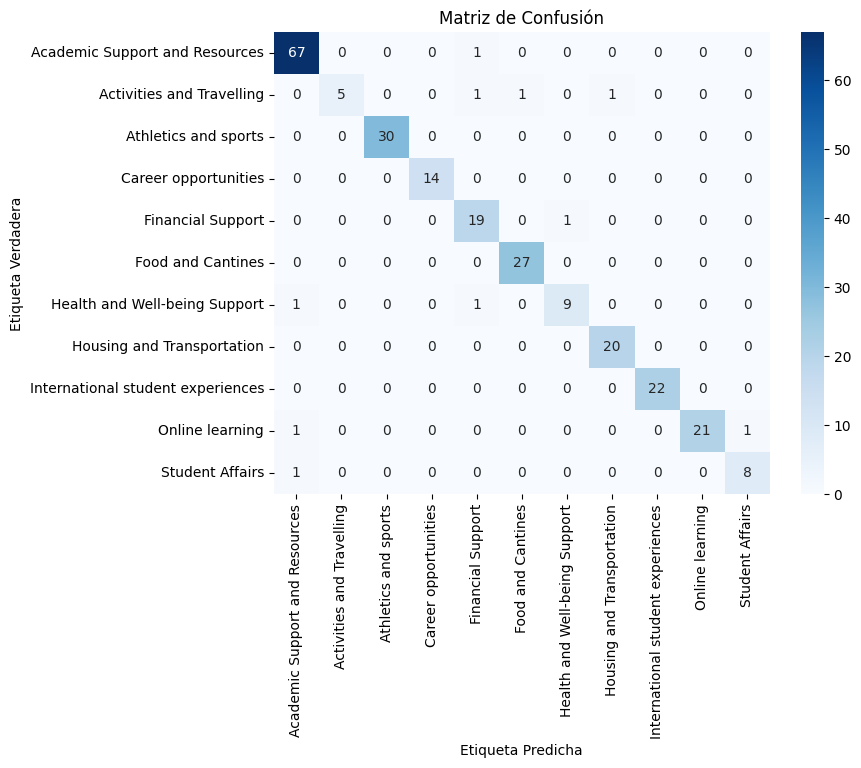

In [ ]:
cm = metrics.confusion_matrix(y_test_unbalanced, predictions)
plt_conf_matrix(cm)

Podemos ver que no hay un sobreajuste debido al porcentaje de precisión del modelo que es 0.9523809523809523. En la gráfica se observa que la predicción en algunas categorías las hace de manera adecuada como lo puede ser "Academic support and resources" sin embargo, en varias categorías no muestra un rendimiento adecuado, lo cual esperamos poder optimizar esto con los datos balanceados.

##### **Usando RandomizedSearchCV**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 13 is smaller than n_iter=50. Running 13 iterations. For exhaustive searches, use GridSearchCV.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: 

Mejores hiperparámetros encontrados: {'alpha': 0.001}
Mejor puntuación en validación cruzada: 96.283%
Precisión de entrenamiento: 100.000%
Precisión de prueba: 96.429%
Confusion matrix:
[[67  0  0  0  1  0  0  0  0  0  0]
 [ 0  6  0  0  1  0  0  1  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  1  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  0  0]
 [ 1  0  0  0  1  0  9  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0]
 [ 1  0  0  0  0  0  0  0  0 22  0]
 [ 1  0  0  0  0  0  0  0  1  0  7]]


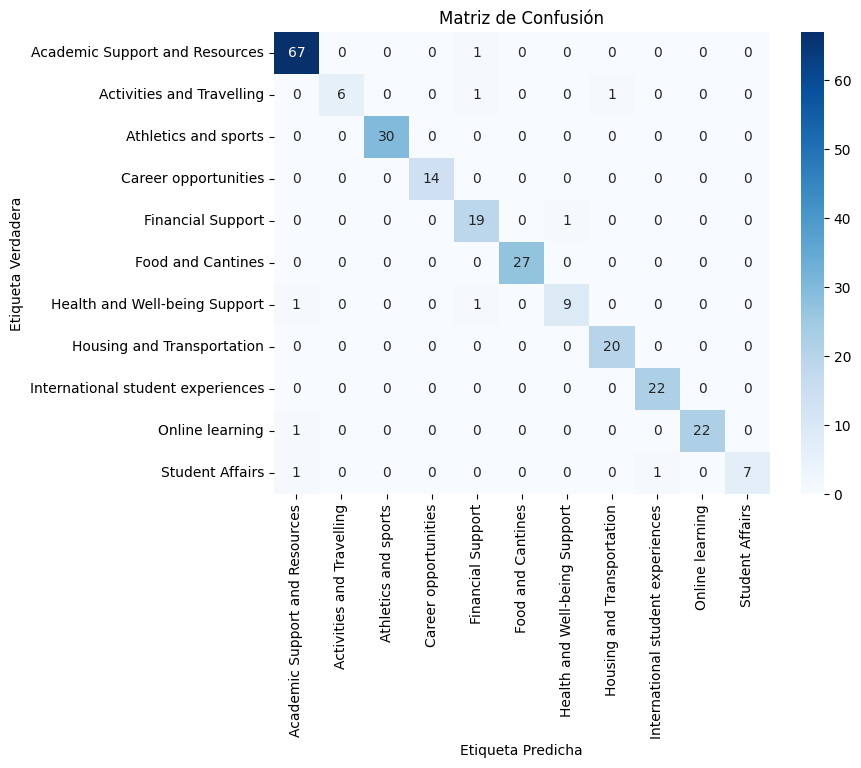

In [ ]:
# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(mlp_classifier, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(xtrain_unbalanced, y_train_unbalanced)

# Mostrar los mejores parámetros encontrados
print("Mejores hiperparámetros encontrados:", random_search.best_params_)

# Evaluar el modelo con los mejores parámetros
predictions_random = random_search.predict(xtest_unbalanced)

# Mostrar la mejor puntuación obtenida en la validación cruzada
print("Mejor puntuación en validación cruzada:", "{:.3f}%".format(random_search.best_score_ * 100))

best_model = random_search.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros en los datos de entrenamiento
y_predict_train_random_search = best_model.predict(xtrain_unbalanced)
accuracy = accuracy_score(y_train_unbalanced, y_predict_train_random_search)
print("Precisión de entrenamiento:", "{:.3f}%".format(accuracy * 100))

# Evaluar el modelo con los mejores hiperparámetros en los datos de prueba
y_predict_random_search = best_model.predict(xtest_unbalanced)
accuracy = accuracy_score(y_test_unbalanced, y_predict_random_search)
print("Precisión de prueba:", "{:.3f}%".format(accuracy * 100))

#Matriz de confusión
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test_unbalanced, predictions_random))

# Mostrar la matriz de confusión
cm_random = metrics.confusion_matrix(y_test_unbalanced, predictions_random)
plt_conf_matrix(cm_random)

Podemos ver una mejora en los resultados de las categorías, sin embargo el resultado todavía deja mucho que desear. Por lo tanto se procederá a analizar los resultados con datos balanceados

#### **Con los datos balanceados**

Aplicamos la misma estructura y procedimientos que cuando lo hicimos con los datos desbalanceados, sólo que a diferencia de lo anterior, lo haremos con los datos balanceados esperando una mejora significativa en los resultados.

In [ ]:
# Escalado de datos
scaler = StandardScaler(with_mean=False)
xtrains = scaler.fit_transform(xtrain)
xtests = scaler.transform(xtest)

In [ ]:
# Definir y entrenar el clasificador MLP
model = MLPClassifier(hidden_layer_sizes=(6, 6), alpha=0.03, max_iter=3000)
model.fit(xtrain, y_train)

# Evaluación del modelo
predictions = model.predict(xtest)
print(accuracy_score(y_test, predictions))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))

0.9938366718027735
Confusion matrix:
[[40  0  0  0  2  0  0  0  0  0  0]
 [ 0 63  0  0  0  0  0  0  0  0  0]
 [ 0  0 67  0  0  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0  0  0]
 [ 2  0  0  0 49  0  0  0  0  0  0]
 [ 0  0  0  0  0 70  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0  0  0 53  0  0]
 [ 0  0  0  0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0  0  0  0 51]]


Podemos ver que hay una mayor precisión en el rendimiento con los datos balanceados a diferencia con los datos desbalanceados. Procederemos a ver como esto mejora usando las diferentes funciones para buscar los mejores parámetros. Cabe recalcar que estos parámetros fueron introducidos manualmente.

##### **Usando GridSearchCV**

In [ ]:
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid=[{'hidden_layer_sizes': [(3, 3), (4, 4), (5, 4)],
                          'max_iter': [100, 500, 1000]},
                         {'alpha': [0.0001, 0.001, 0.01, 0.1]}],
             scoring='accuracy')

In [ ]:
# Mejores parámetros encontrados por GridSearchCV
print(grid_search.best_params_)

{'alpha': 0.001}


Precisión del entrenamiento: 100.000%
Precisión de prueba: 99.384%
0.9938366718027735
Confusion matrix:
[[42  0  0  0  0  0  0  0  0  0  0]
 [ 0 63  0  0  0  0  0  0  0  0  0]
 [ 0  0 67  0  0  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0  0  0]
 [ 4  0  0  0 47  0  0  0  0  0  0]
 [ 0  0  0  0  0 70  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0  0  0 53  0  0]
 [ 0  0  0  0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0  0  0  0 51]]


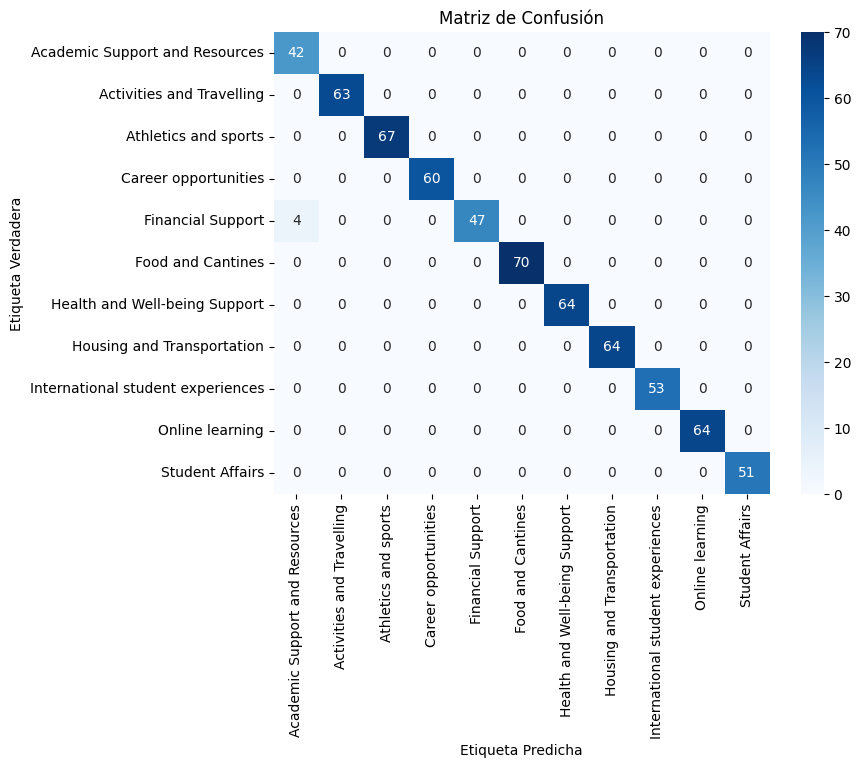

In [ ]:
y_train_pred = grid_search.predict(xtrain)
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

y_pred = grid_search.predict(xtest)
test_accuracy = accuracy_score(y_test, y_pred) * 100

print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))

# Evaluación del modelo con los mejores parámetros
predictions = grid_search.predict(xtest)
print(accuracy_score(y_test, predictions))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))

cm = metrics.confusion_matrix(y_test, predictions)
plt_conf_matrix(cm)

Como podemos observar, los resultados mejoraron drásticamente alcanzando casi un 100% de precisión. Esto es esperable debido a que ahora el modelo no se ve un poco sesgado por la gran variabilidad de datos que tenía la primera categoría cuando los datos no se habían balanceados.

##### **Usando RandomizedSearchCV**

In [ ]:
# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(mlp_classifier, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(xtrain, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 13 is smaller than n_iter=50. Running 13 iterations. For exhaustive searches, use GridSearchCV.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: 

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=50,
                   param_distributions=[{'hidden_layer_sizes': [(3, 3), (4, 4),
                                                                (5, 4)],
                                         'max_iter': [100, 500, 1000]},
                                        {'alpha': [0.0001, 0.001, 0.01, 0.1]}],
                   random_state=42, scoring='accuracy')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores hiperparámetros encontrados:", random_search.best_params_)

Mejores hiperparámetros encontrados: {'alpha': 0.01}


Mejor puntuación en validación cruzada: 99.641%
Precisión de entrenamiento: 100.000%
Precisión de prueba: 99.384%
Confusion matrix:
[[42  0  0  0  0  0  0  0  0  0  0]
 [ 0 63  0  0  0  0  0  0  0  0  0]
 [ 0  0 67  0  0  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0  0  0]
 [ 4  0  0  0 47  0  0  0  0  0  0]
 [ 0  0  0  0  0 70  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0  0  0 53  0  0]
 [ 0  0  0  0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0  0  0  0 51]]


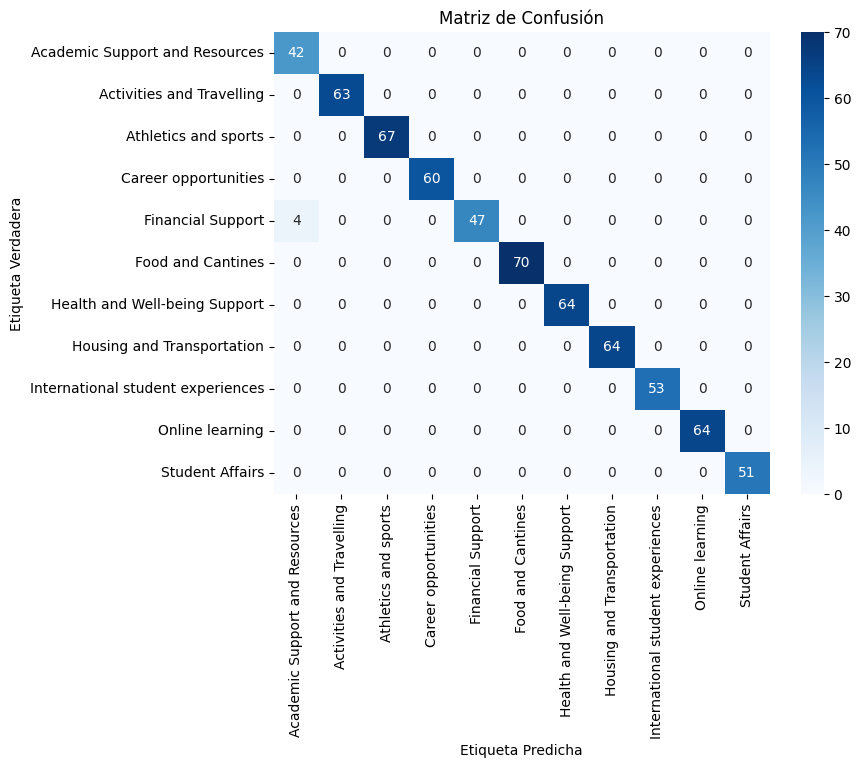

In [ ]:
# Evaluar el modelo con los mejores parámetros
predictions_random = random_search.predict(xtest)

# Mostrar la mejor puntuación obtenida en la validación cruzada
print("Mejor puntuación en validación cruzada:", "{:.3f}%".format(random_search.best_score_ * 100))

best_model = random_search.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros en los datos de entrenamiento
y_predict_train_random_search = best_model.predict(xtrain)
accuracy = accuracy_score(y_train, y_predict_train_random_search)
print("Precisión de entrenamiento:", "{:.3f}%".format(accuracy * 100))

# Evaluar el modelo con los mejores hiperparámetros en los datos de prueba
y_predict_random_search = best_model.predict(xtest)
accuracy = accuracy_score(y_test, y_predict_random_search)
print("Precisión de prueba:", "{:.3f}%".format(accuracy * 100))

#Matriz de confusión
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions_random))

# Mostrar la matriz de confusión
cm_random = metrics.confusion_matrix(y_test, predictions_random)
plt_conf_matrix(cm_random)

Ambos métodos nos arrojan el mismo rendimiento al momento de analizar los datos, por lo tanto podríamos hacer uso de cualquiera de los dos para el entrenamiento de este modelo.

### **Concluciones**

En general, los modelos que utilizaron datos balanceados, como los Árboles de Decisión y Random Forest, demostraron un rendimiento destacado con precisiones del 100% o muy cercanas en las pruebas. Además, la selección de parámetros mediante GridSearchCV mostró una consistencia superior en términos de rendimiento en comparación con RandomizedSearchCV en la mayoría de los casos.

El modelo de Random Forest con datos balanceados muestra una precisión de prueba del 100%, lo que es impresionante. Esto podría considerarse como el mejor rendimiento en términos de precisión. Por otro lado
los modelos de Árboles de Decisión con datos balanceados también muestran resultados sólidos, con precisiones de prueba cercanas al 99%. Además, estos modelos tienden a ser más eficientes computacionalmente que Random Forest, lo que puede ser una ventaja dependiendo de los requisitos del proyecto.

Por último las Redes Neuronales con datos balanceados también muestran una precisión de prueba superior al 99%, lo que indica un buen rendimiento. Sin embargo, suelen ser más complejas y computacionalmente intensivas en comparación con los árboles de decisión o Random Forest.

En nuestro caso la precisión es el criterio principal por lo que se escoge Random Forest como la mejor alternativa.

Para mejorar los resultados y la evaluación de los modelos, se podría explorar aún más las características para una comprensión más profunda de las variables utilizadas. Además, considerar técnicas avanzadas de manejo del desbalance de clases podría fortalecer la capacidad del modelo en clases minoritarias. La optimización de hiperparámetros podría extenderse mediante la exploración de combinaciones adicionales o la implementación de técnicas más avanzadas. Una validación cruzada más rigurosa y un análisis detallado de errores también son aspectos a tener en cuenta.